In [12]:
import csv
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from scipy.spatial import ConvexHull

In [3]:
from chromalab.observer import Observer, Cone, transformToChromaticity, getHeringMatrix
from chromalab.spectra import Spectra, Illuminant, convert_refs_to_spectras
from chromalab.maxbasis import MaxBasis
from chromalab.visualizer import PSWrapper, DisplayBasisType, exportAndPlay, easeFunction
from chromalab.animation import *

objc[12820]: Class GLFWApplicationDelegate is implemented in both /Users/jessicalee/anaconda3/envs/chromalab/lib/python3.11/site-packages/open3d/cpu/pybind.cpython-311-darwin.so (0x28fe52e28) and /Users/jessicalee/anaconda3/envs/chromalab/lib/python3.11/site-packages/polyscope_bindings.cpython-311-darwin.so (0x2bdb1eea0). One of the two will be used. Which one is undefined.
objc[12820]: Class GLFWWindowDelegate is implemented in both /Users/jessicalee/anaconda3/envs/chromalab/lib/python3.11/site-packages/open3d/cpu/pybind.cpython-311-darwin.so (0x28fe52db0) and /Users/jessicalee/anaconda3/envs/chromalab/lib/python3.11/site-packages/polyscope_bindings.cpython-311-darwin.so (0x2bdb1eec8). One of the two will be used. Which one is undefined.
objc[12820]: Class GLFWContentView is implemented in both /Users/jessicalee/anaconda3/envs/chromalab/lib/python3.11/site-packages/open3d/cpu/pybind.cpython-311-darwin.so (0x28fe52e50) and /Users/jessicalee/anaconda3/envs/chromalab/lib/python3.11/site-

In [4]:
%load_ext autoreload
%autoreload 2
%matplotlib ipympl

In [5]:
wavelengths1 = np.arange(390, 701, 1)
wavelengths5 = np.arange(400, 701, 5)
wavelengths10 = np.arange(400, 701, 10)

In [6]:
wavelengths = np.arange(400, 710, 10)
d65 = Illuminant.get("D65")

In [7]:
def plotMaxBasis(maxbasis, wavelengths, dim):
    refs, discrete_points, rgbs, lines = maxbasis.getDiscreteRepresentation()

    size = (2, 2) if dim == 2 else (3, 3) if dim == 3 else (4, 4)
    fig, axs = plt.subplots(size[0], size[1], figsize=(8, 8))
    for i in range(size[0]):
        for j in range(size[1]):
            if i*size[0]+j >= len(refs):
                break
            axs[i, j].plot(wavelengths, refs[i*size[0]+j].data, c=rgbs[i*size[0] + j])
            axs[i, j].fill_between(wavelengths, refs[i*size[0]+j].data, color=rgbs[i*size[0] + j])
            axs[i, j].set_xlabel('Wavelength')
            axs[i, j].set_ylabel('Reflectance')
            # axs[i, j].set_title(f'Ref {i*4+j}')
    plt.tight_layout()
    plt.show()
    return refs, rgbs


In [11]:
protanope = Observer.protanope(wavelengths=wavelengths1, illuminant=d65)
maxbasis_pro = MaxBasis(protanope, verbose=True)
# refs, rgbs = plotMaxBasis(maxbasis_pro, wavelengths1, 2)

100%|██████████| 308/308 [00:00<00:00, 20328.98it/s]
/Users/jessicalee/Projects/generalized-colorimetry/code/ChromaLab/chromalab/spectra.py:36: UserWarning: Data has values not between 0 and 1. Clipping.
  warnings.warn("Data has values not between 0 and 1. Clipping.")


In [15]:
def getDichromaticManifold(obs):
    opt_colors, opt_rgbs = obs.get_optimal_colors()
    full_points, full_colors = obs.get_full_colors()
    
    boundary = ConvexHull(opt_colors)

    boundary_pts = opt_colors[boundary.vertices]
    boundary_rgbs = opt_rgbs[boundary.vertices]
    
    allpts = np.append(boundary_pts,np.zeros([len(boundary_pts),1]),1)
    A = np.array([allpts, boundary_rgbs])
    np.save("../../../optimal-object-colors/core/Visualizer/vertex_data/dichrom2.npy", A)


100%|██████████| 308/308 [00:00<00:00, 17131.19it/s]


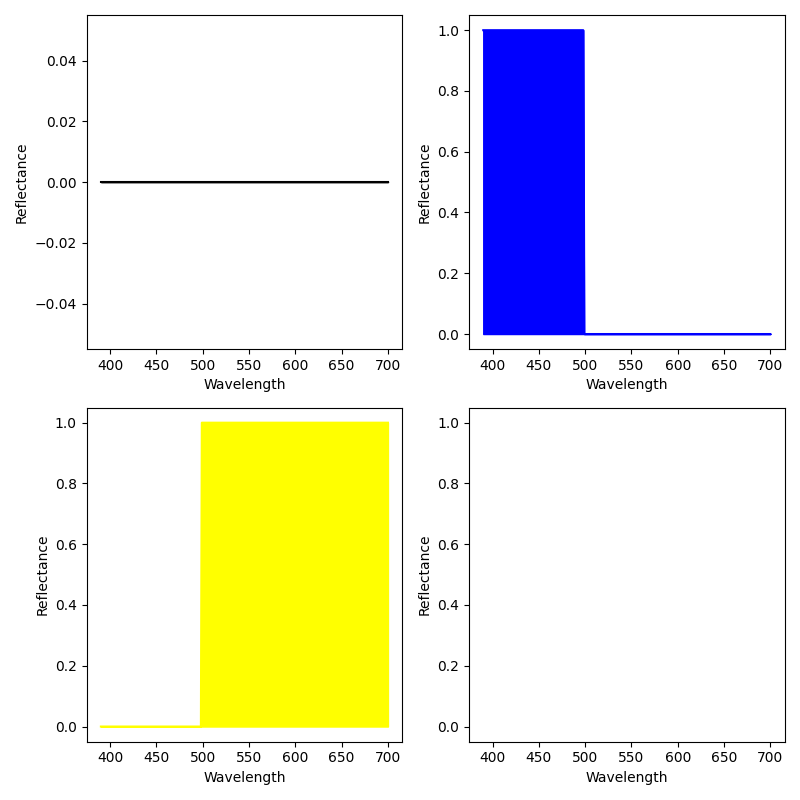

In [9]:
deuteranope = Observer.deuteranope(wavelengths=wavelengths1, illuminant=d65)
maxbasis_deu = MaxBasis(deuteranope, verbose=True)
refs, rgbs = plotMaxBasis(maxbasis_deu, wavelengths1, 2)

100%|██████████| 308/308 [00:00<00:00, 19771.43it/s]


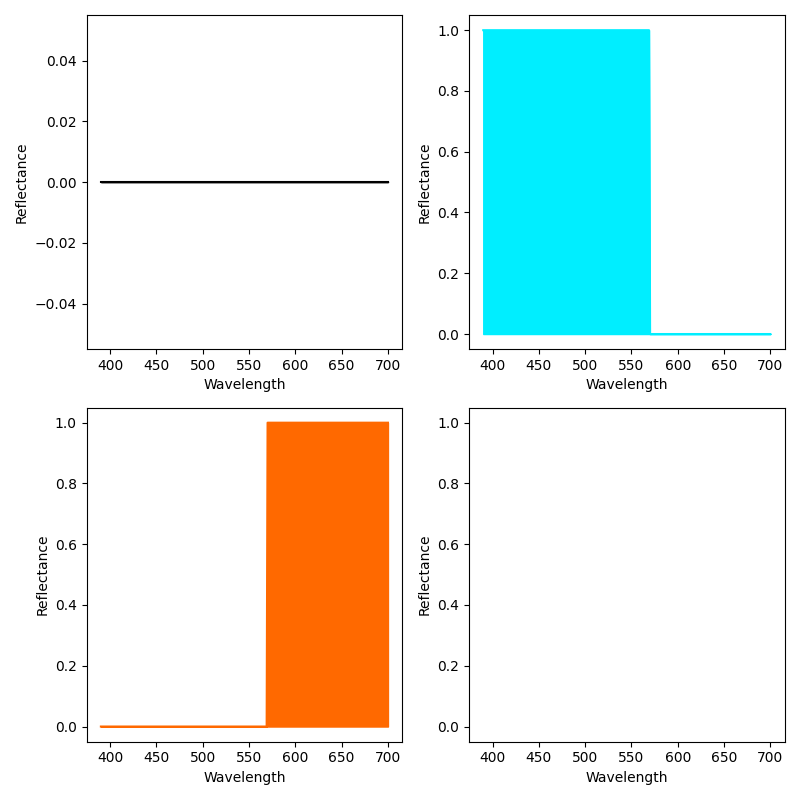

In [10]:
tritanope = Observer.tritanope(wavelengths=wavelengths1, illuminant=d65)
maxbasis_tritan = MaxBasis(tritanope, verbose=True)
refs, rgbs = plotMaxBasis(maxbasis_tritan, wavelengths1, 2)